# Analysis of sales and profits by product categories in the E-commerce sector.

## Description:
Online store owners want to understand which product categories bring the most profit, what the sales dynamics are and how this changes seasonally. It is necessary to conduct an analysis of sales and profits by product categories over the past year.

### Tasks:
1) Load and clean data.
2) Analyze sales by category (ABC analysis).
3) Find products with the highest and lowest margins.
4) Determine seasonal trends (STL decomposition, SARIMAX).
5) Identify dependencies between discounts and sales.
6) Report and recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Load and clean data.

In [2]:
df = pd.read_excel(r'C:\Users\User\Downloads\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
# Checking and removing outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
    outlers = ((df[col]<lower_bound)| (df[col]>upper_bound)).sum()
    print(f'Column outliers {col}: {outlers}')

Column outliers Quantity: 0
Column outliers UnitPrice: 0
Column outliers CustomerID: 0


In [6]:
df = df[df['Quantity']>= 0]

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,326468.000000,326468,326468.000000,326468.000000
mean,5.754916,2011-07-12 05:19:26.568730112,2.608561,15350.899947
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-07 12:38:00,1.250000,14049.000000
50%,4.000000,2011-08-02 14:04:00,1.950000,15296.000000
75%,10.000000,2011-10-23 15:11:00,3.750000,16871.000000
max,23.000000,2011-12-09 12:50:00,8.500000,18287.000000
std,4.641806,NaN,1.991114,1703.921780


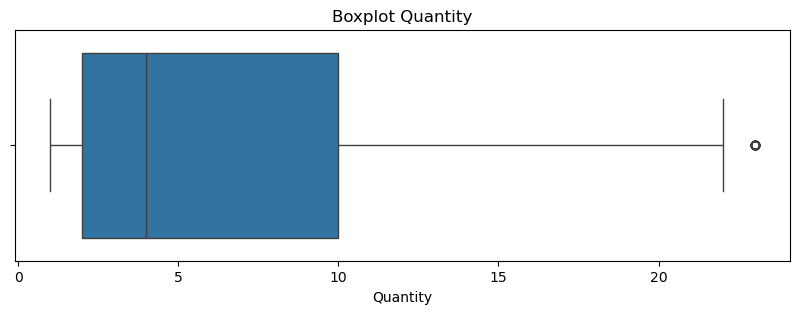

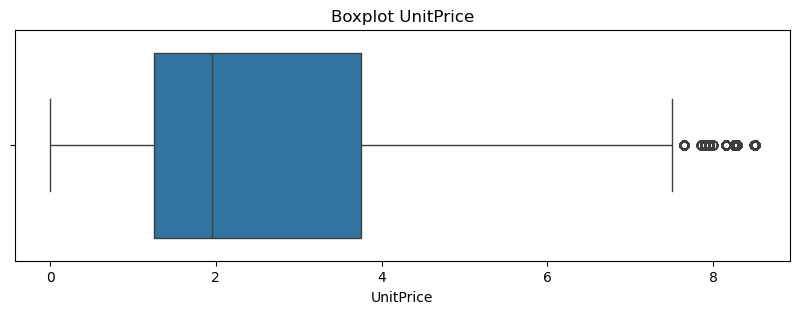

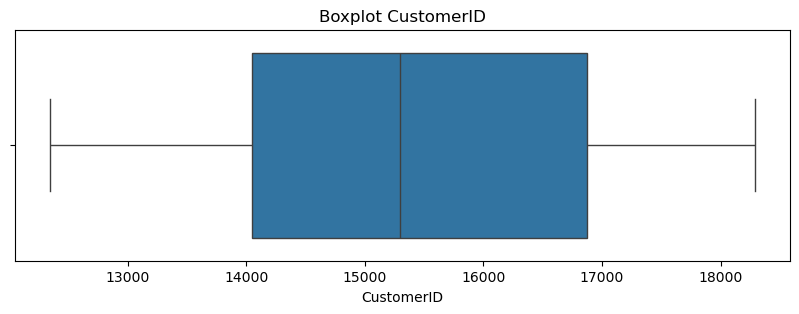

In [8]:
# Checking Outliers with Boxplot Visualization
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot Quantity')
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot UnitPrice')
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(x=df['CustomerID'])
plt.title('Boxplot CustomerID')
plt.show()

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.duplicated().sum()

4969

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

#### 2) Analyze sales by category (ABC analysis).

In [13]:
df['sales'] = df['Quantity'] * df['UnitPrice']

In [14]:
df_sorted = df.groupby('StockCode')['sales'].sum().sort_values(ascending=False)
df_sorted = df_sorted.to_frame().reset_index()
df_sorted['cum_revenue'] = df_sorted['sales'].cumsum()
df_sorted['revenue_percent'] = df_sorted['cum_revenue'] / df_sorted['sales'].sum()
df_sorted['ABC_category'] = df_sorted['revenue_percent'].apply(lambda x: 'A' if x <= 0.8 else ('B' if x <= 0.95 else 'C'))

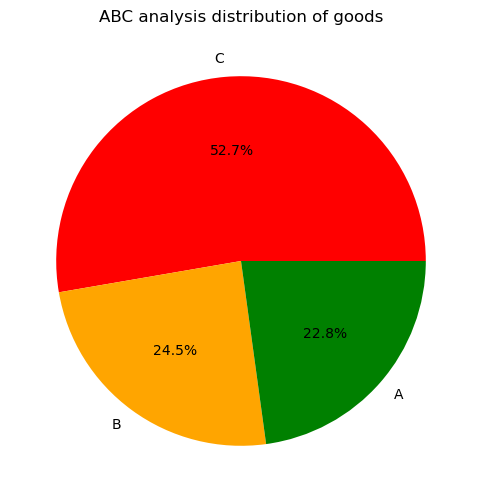

In [15]:
plt.figure(figsize=(10,6))
df_sorted['ABC_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red','orange','green'])
plt.title('ABC analysis distribution of goods')
plt.ylabel('')
plt.show()

In [16]:
df = df.merge(df_sorted[['StockCode', 'ABC_category']], on='StockCode', how='left')

#### 3) Find products with the highest and lowest margins.

C:\Users\User\AppData\Local\Temp\ipykernel_7904\682529780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product.values, y=top_product.index, palette='Blues_r')


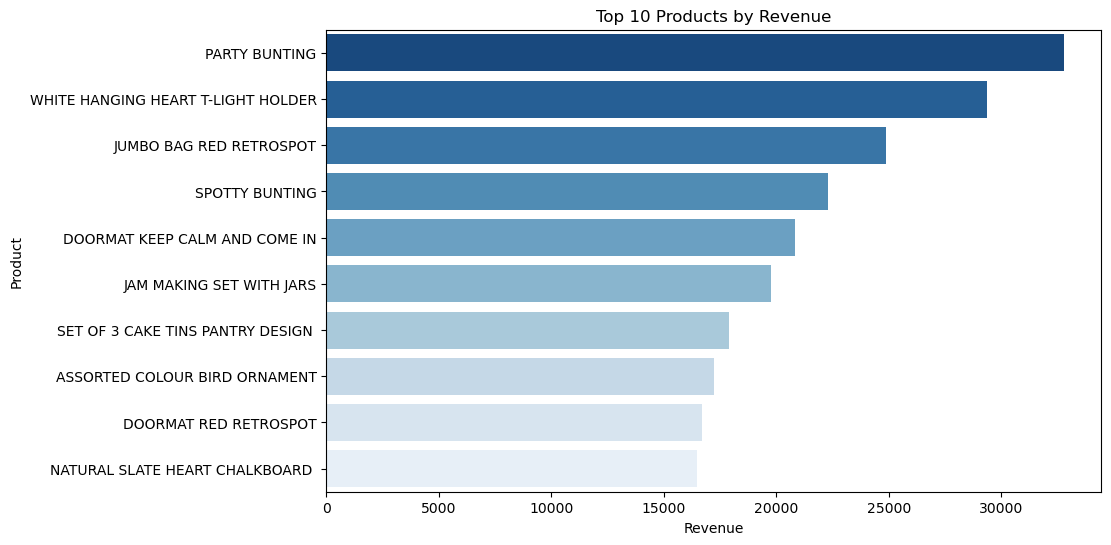

C:\Users\User\AppData\Local\Temp\ipykernel_7904\682529780.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bad_product.values, y=bad_product.index, palette='Blues_r')


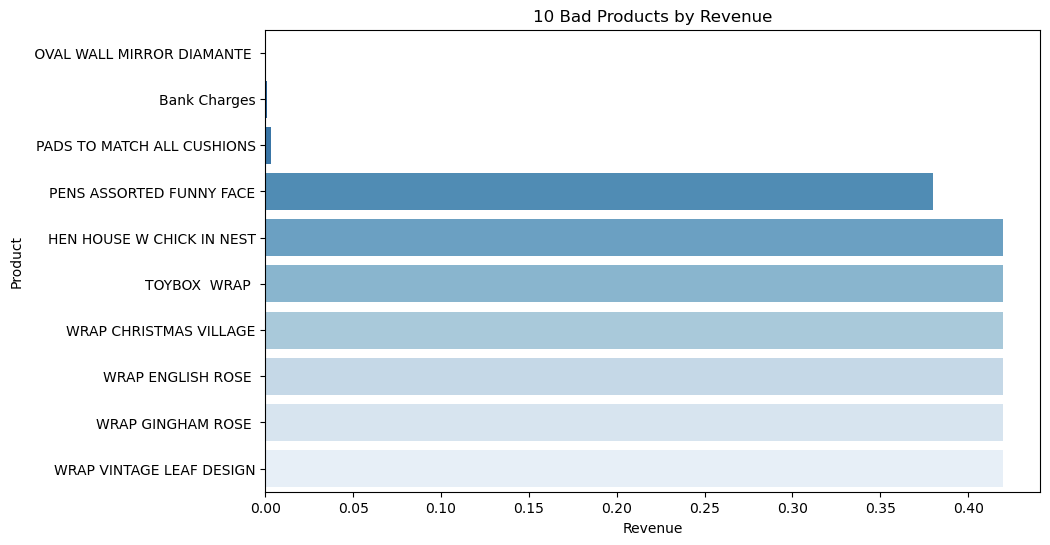

In [17]:
top_product = df.groupby('Description')['sales'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_product.values, y=top_product.index, palette='Blues_r')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.show()

bad_product = df.groupby('Description')['sales'].sum().nsmallest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=bad_product.values, y=bad_product.index, palette='Blues_r')
plt.title('10 Bad Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.show()

#### 4) Determine seasonal trends (STL decomposition, SARIMAX).

In [18]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
# Group by date
df_daily = df.groupby('InvoiceDate')['sales'].sum().reset_index()
df_daily = df_daily.set_index('InvoiceDate').resample('D').sum().fillna(0)

In [20]:
# STL-decomposition
stl = STL(df_daily['sales'], seasonal=29)
result = stl.fit()

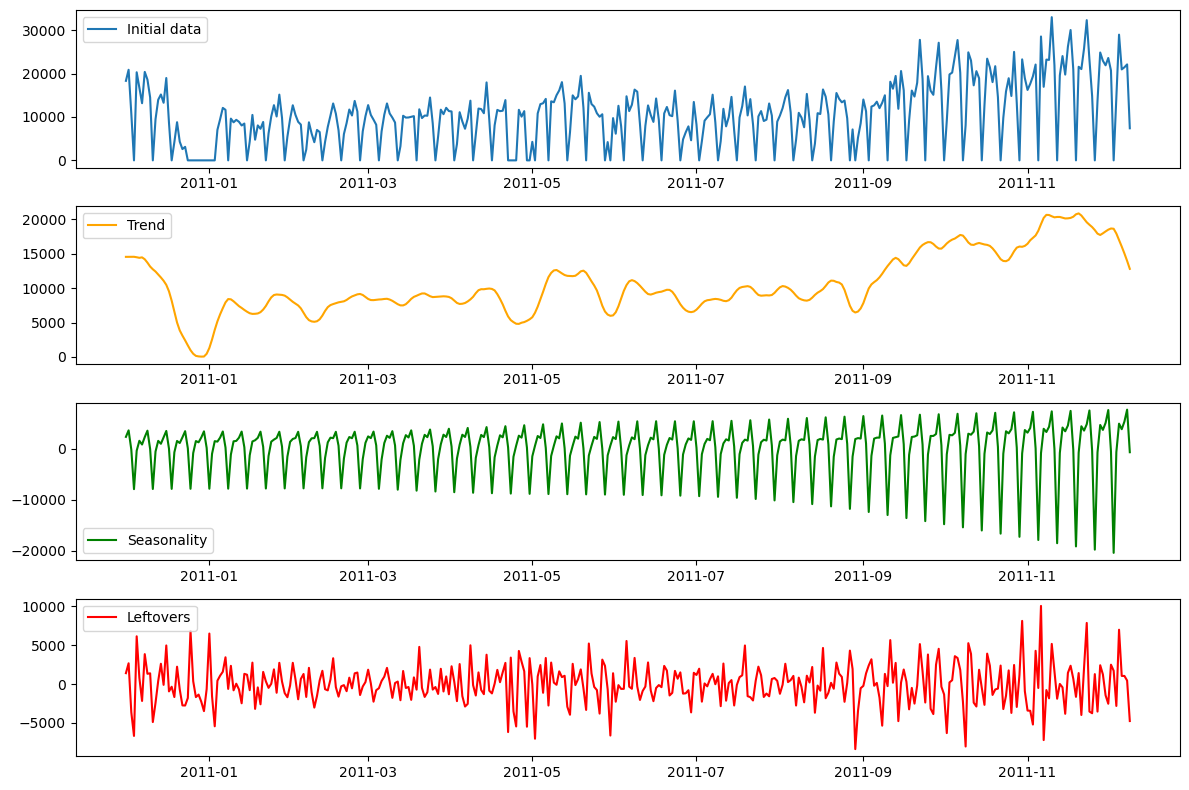

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(df_daily.index, df_daily['sales'], label='Initial data')
plt.legend()

plt.subplot(4,1,2)
plt.plot(df_daily.index, result.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(df_daily.index, result.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(df_daily.index, result.resid, label='Leftovers', color='red')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Removing seasonality for the trend model
y_deseasonalized = df_daily['sales'] - result.seasonal

In [23]:
# SARIMA on cleaned data
model = SARIMAX(y_deseasonalized, order=(1,1,1), seasonal_order=(1,1,1,30))
sarima_result = model.fit(disp=False)

In [24]:
# 90 day forecast
forecast_steps = 90
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_daily.index[-1] + pd.Timedelta(days=1)
                               , periods=forecast_steps, freq='D')
forecast_mean = forecast.predicted_mean + result.seasonal[-30:].mean()

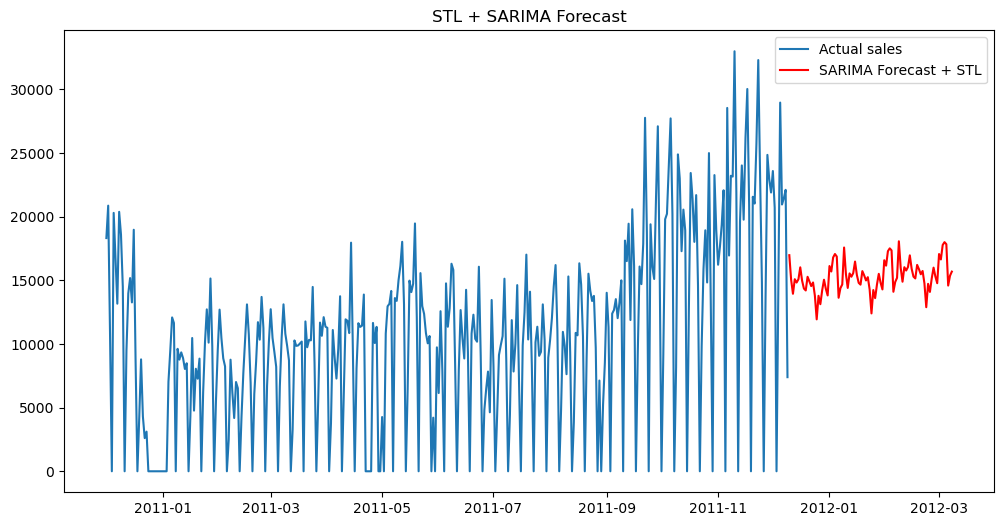

In [25]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily['sales'], label='Actual sales')
plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast + STL', color='red')
plt.legend()
plt.title('STL + SARIMA Forecast')
plt.show()

In [26]:
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  374
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3290.428
Date:                            Sat, 03 May 2025   AIC                           6590.856
Time:                                    00:57:23   BIC                           6610.044
Sample:                                12-01-2010   HQIC                          6598.499
                                     - 12-09-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0281      0.082      0.341      0.733      -0.133       0.190
ma.L1         -0.7029      0.062   

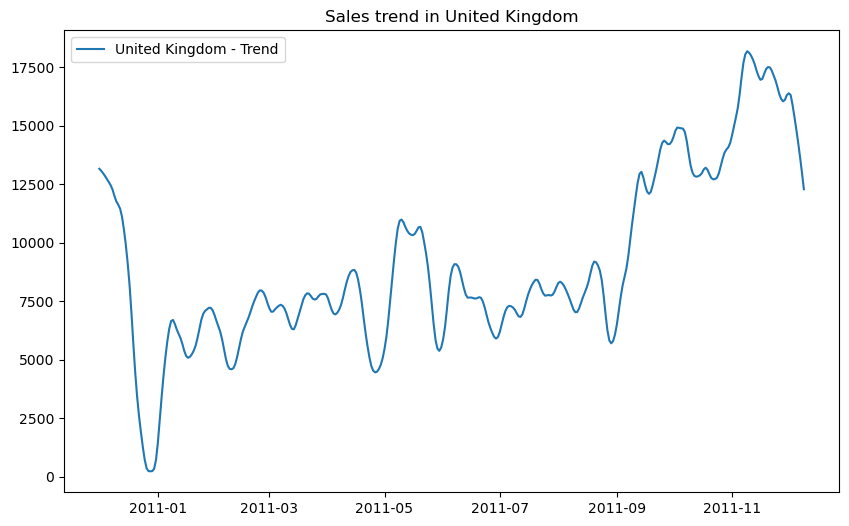

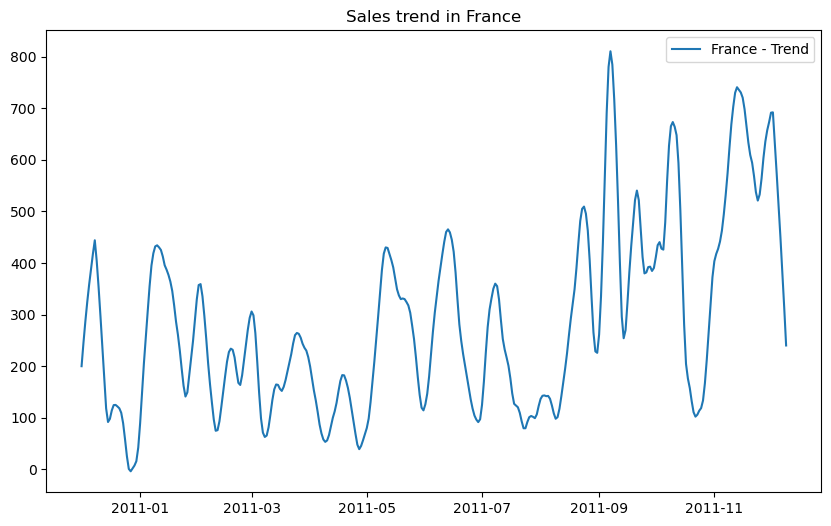

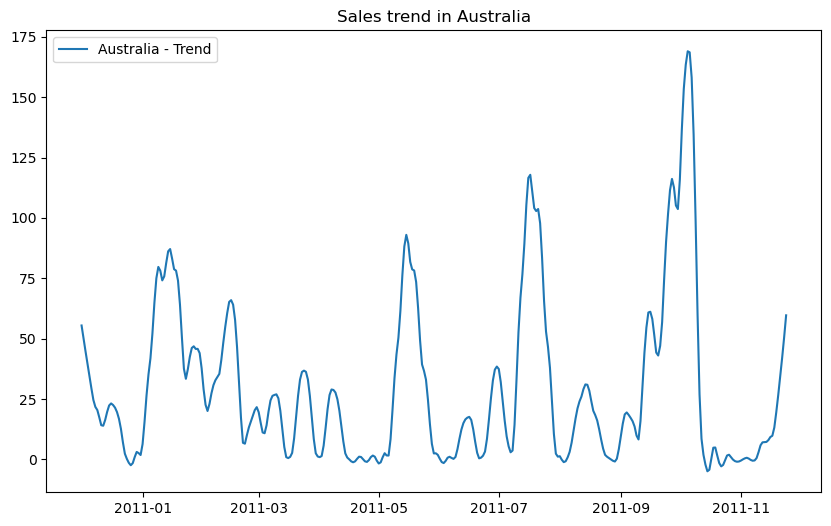

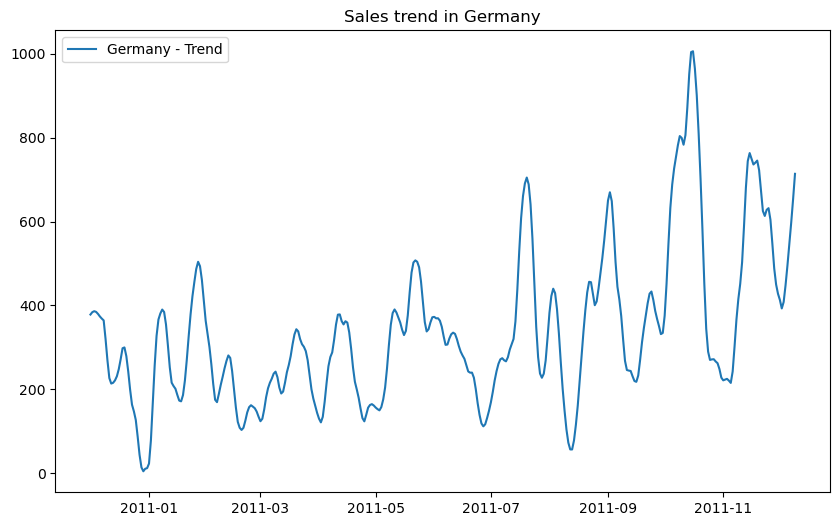

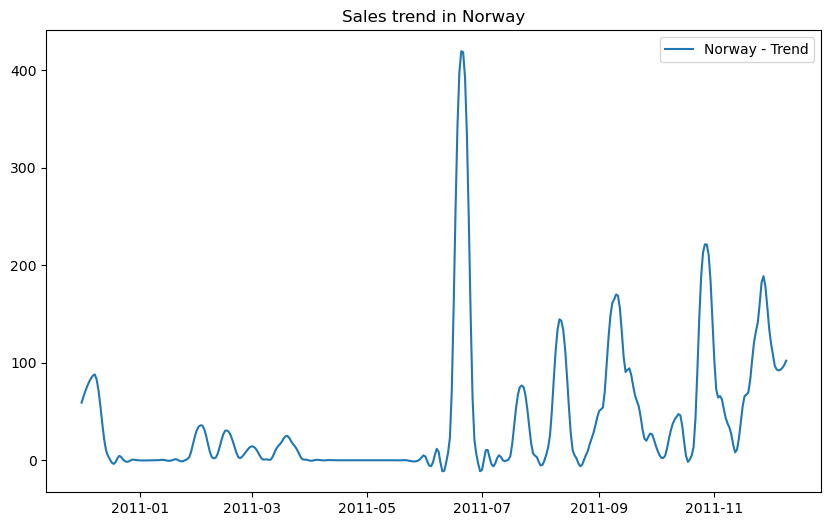

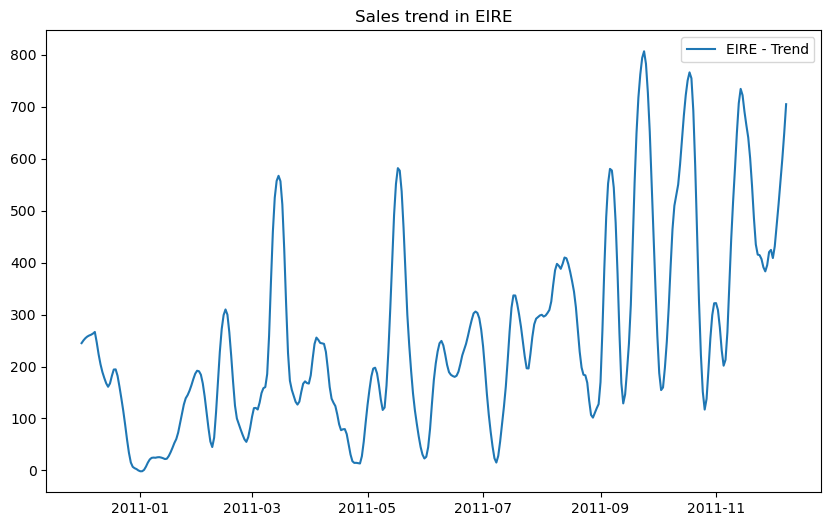

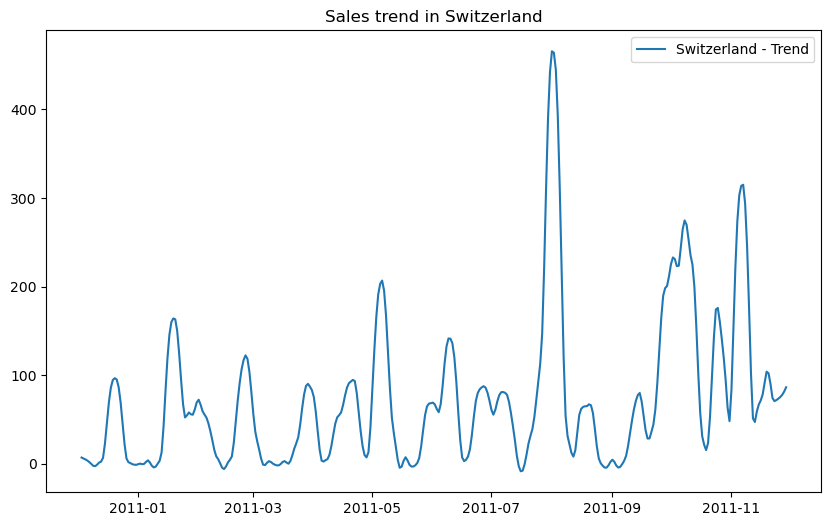

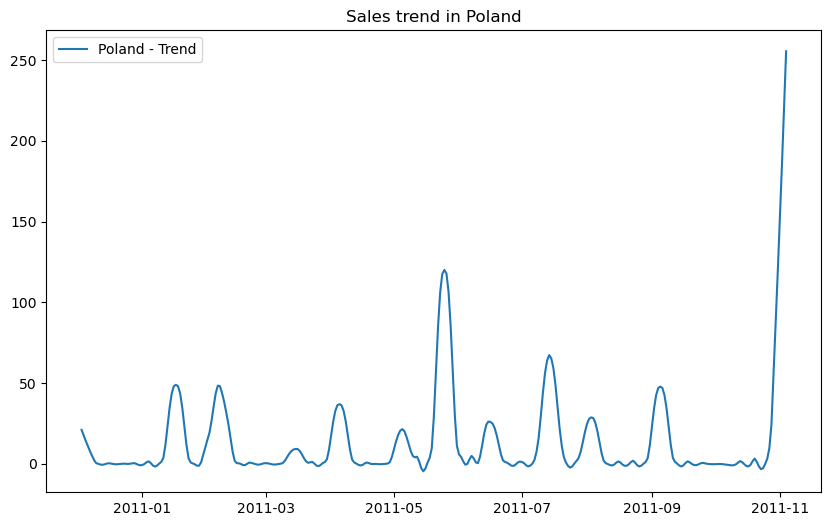

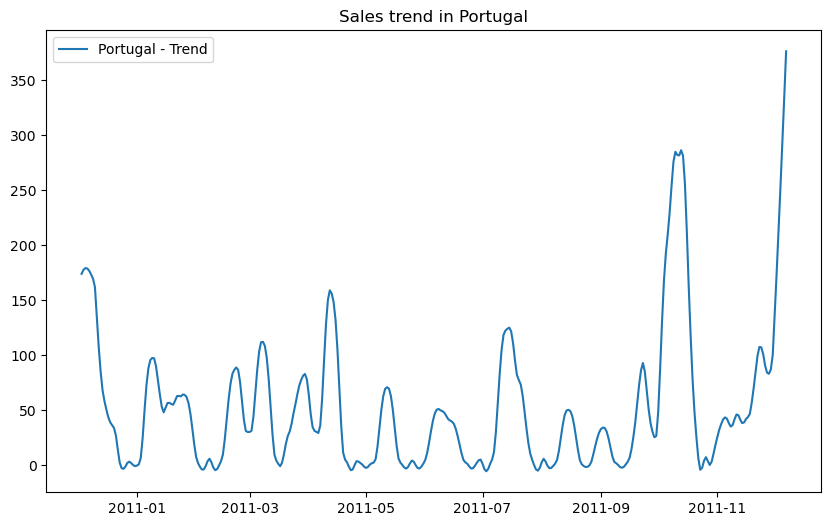

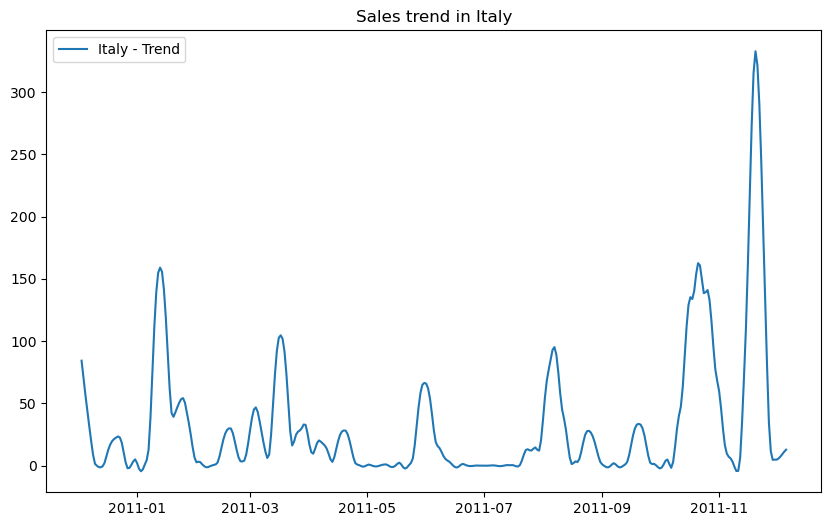

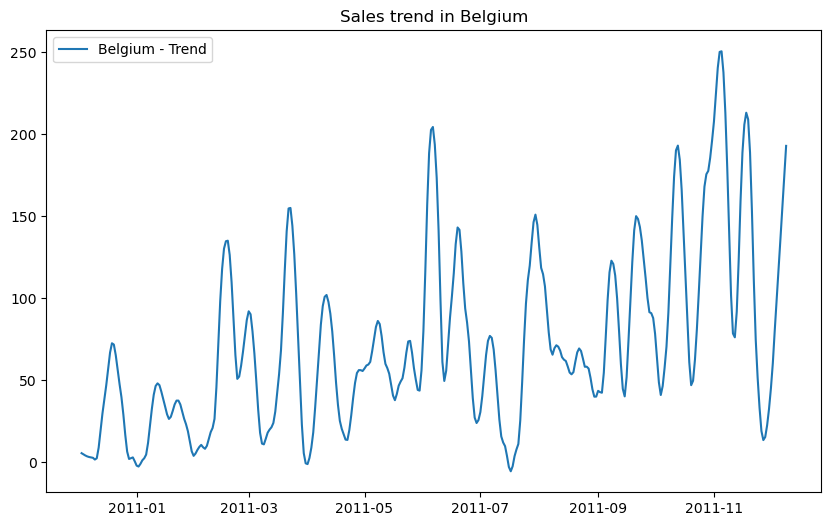

Not enough data for STL in Lithuania


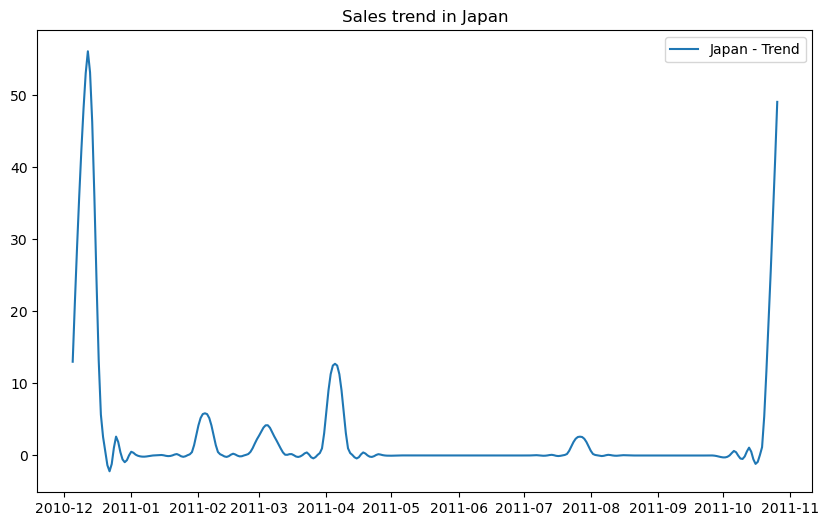

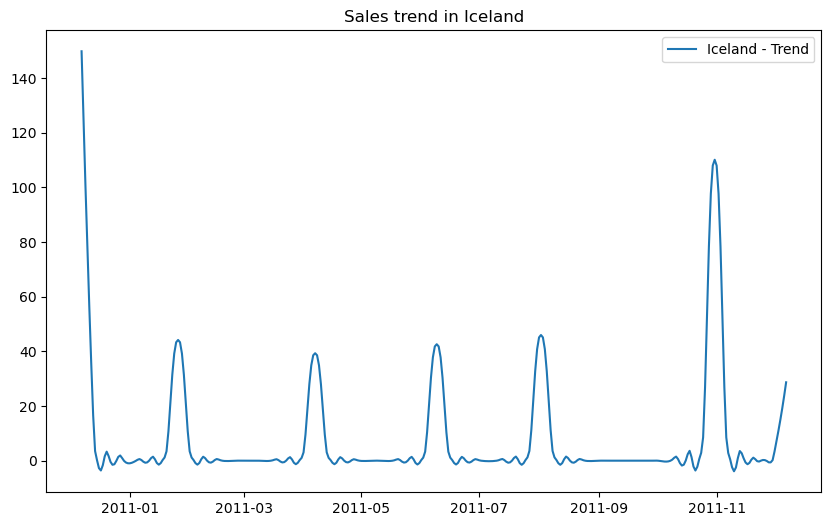

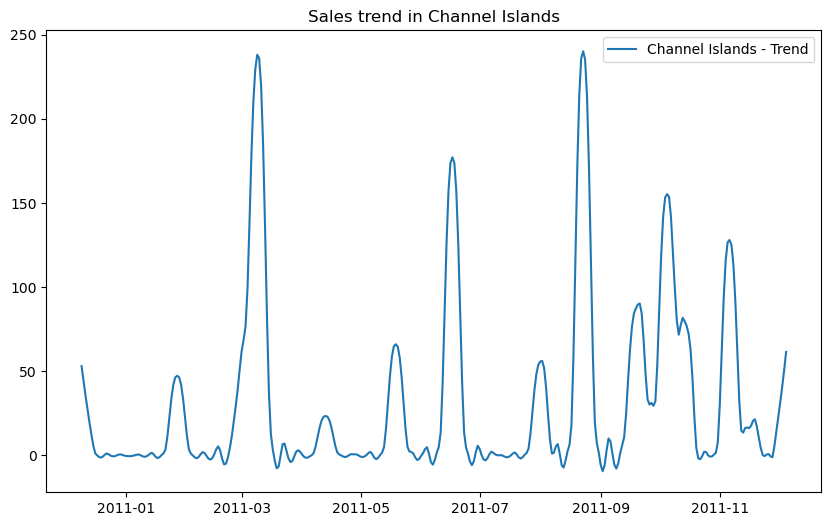

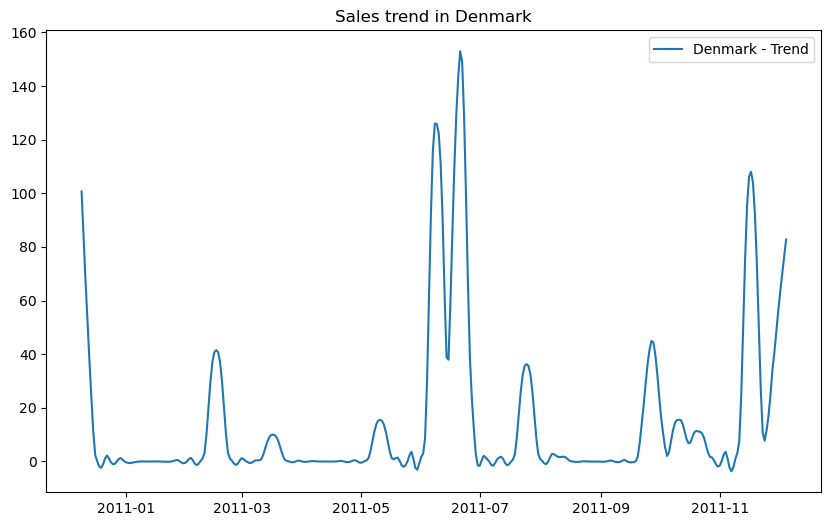

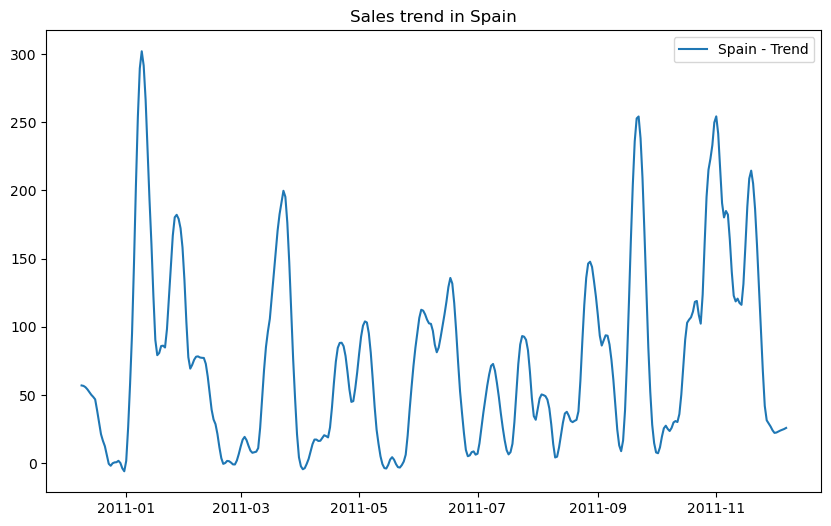

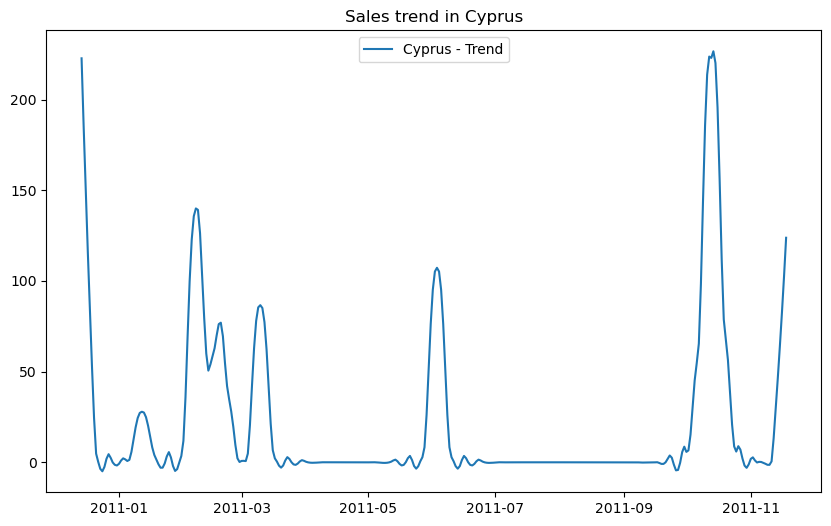

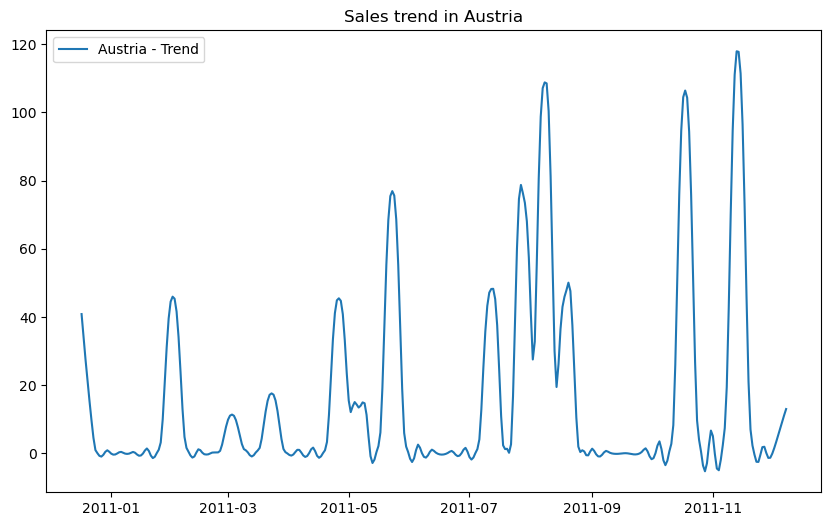

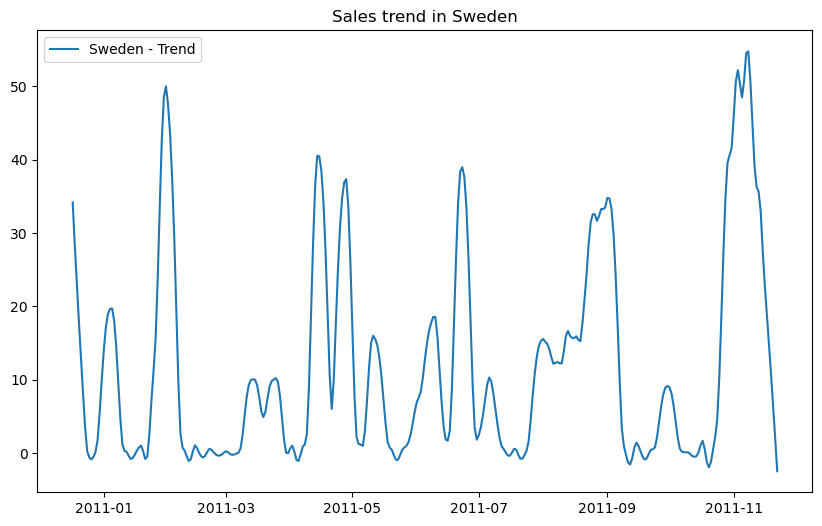

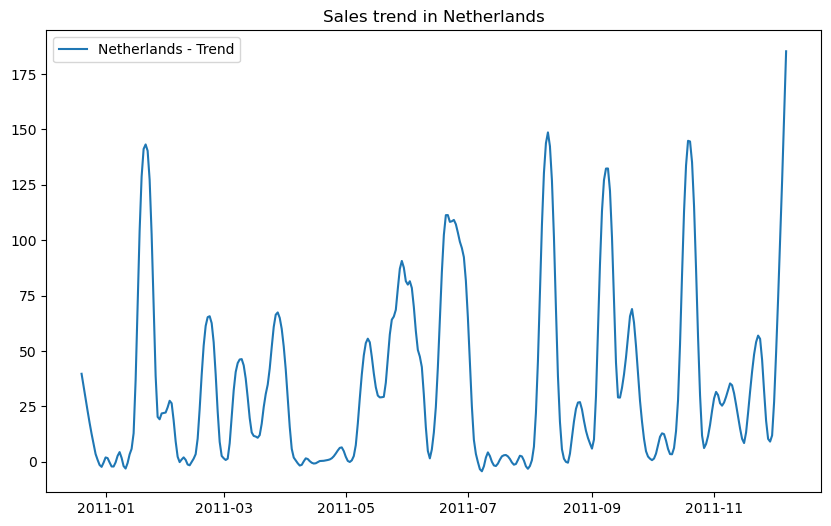

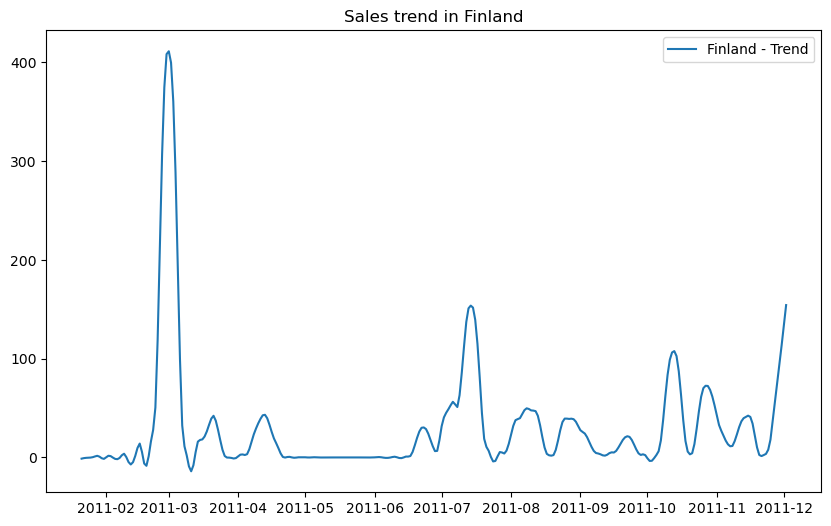

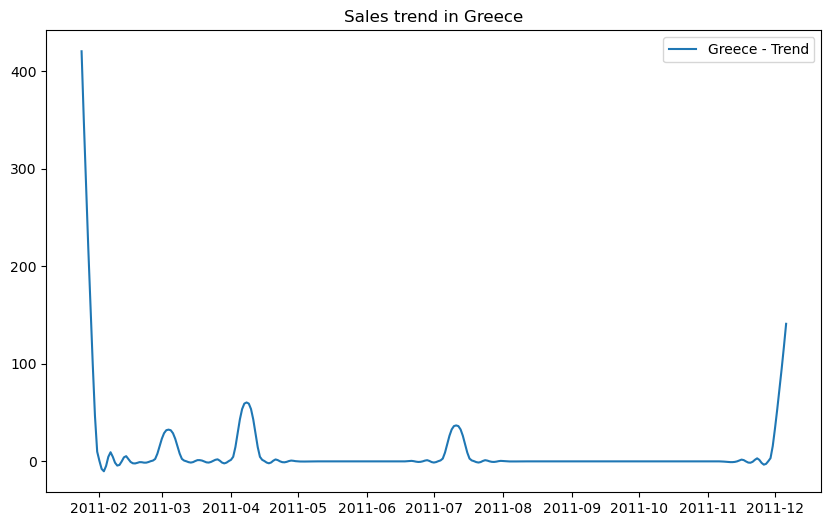

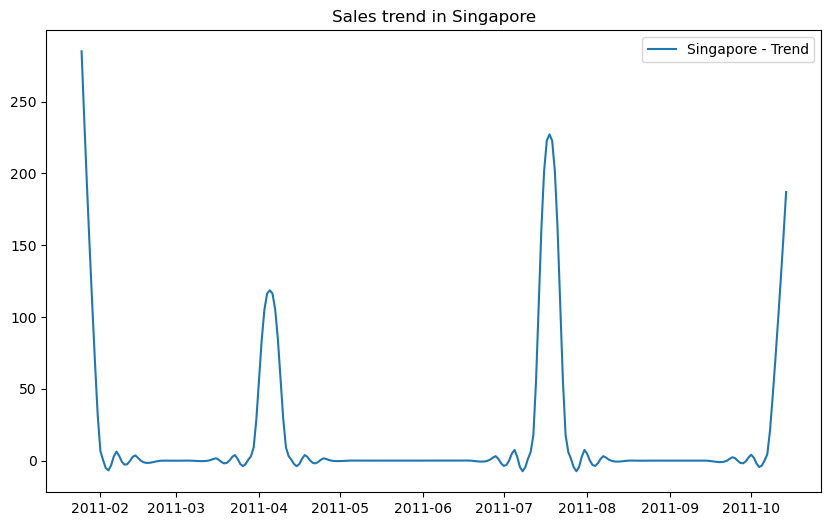

Not enough data for STL in Lebanon


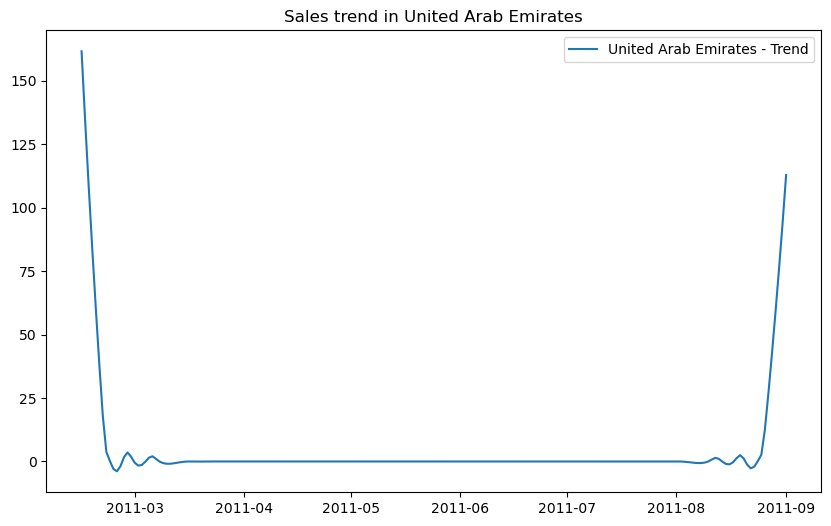

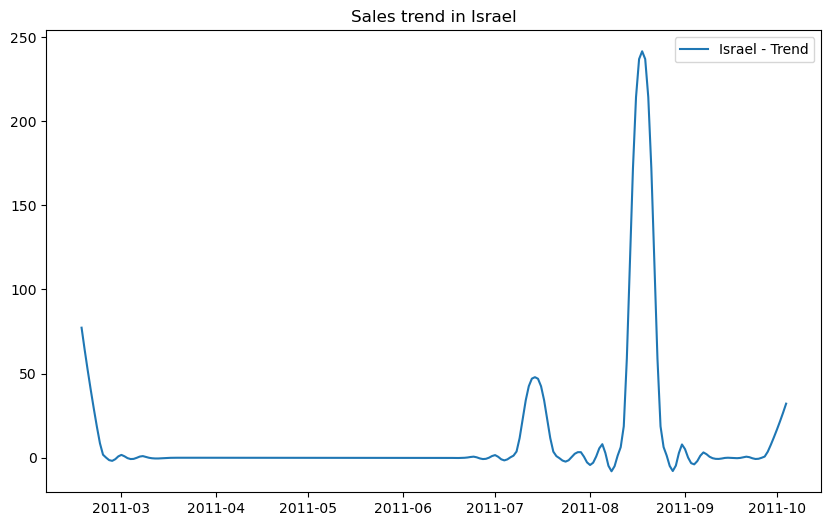

Not enough data for STL in Saudi Arabia


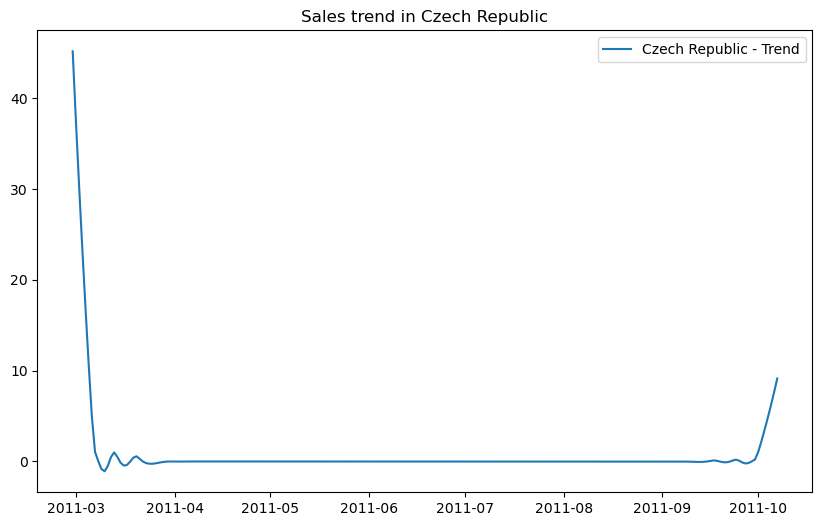

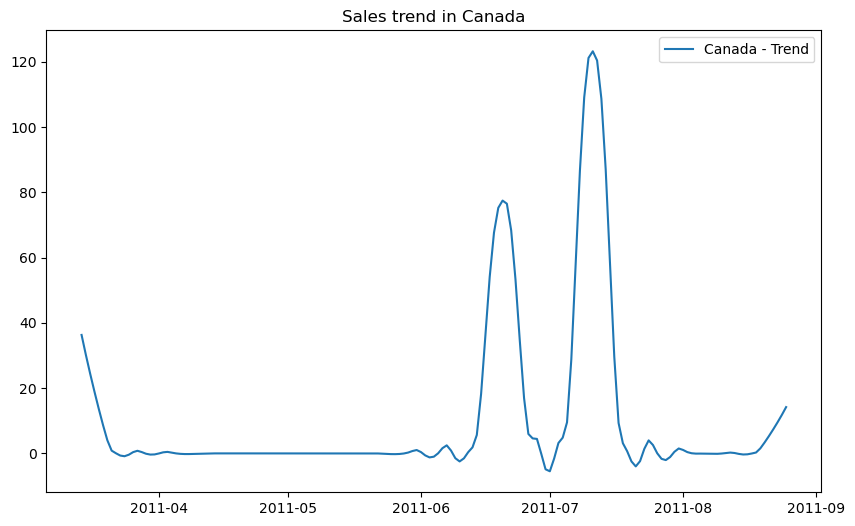

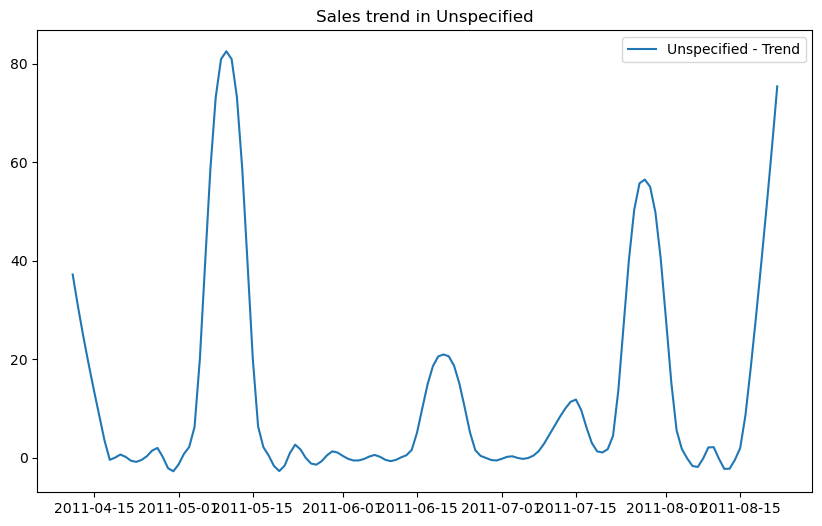

Not enough data for STL in Brazil


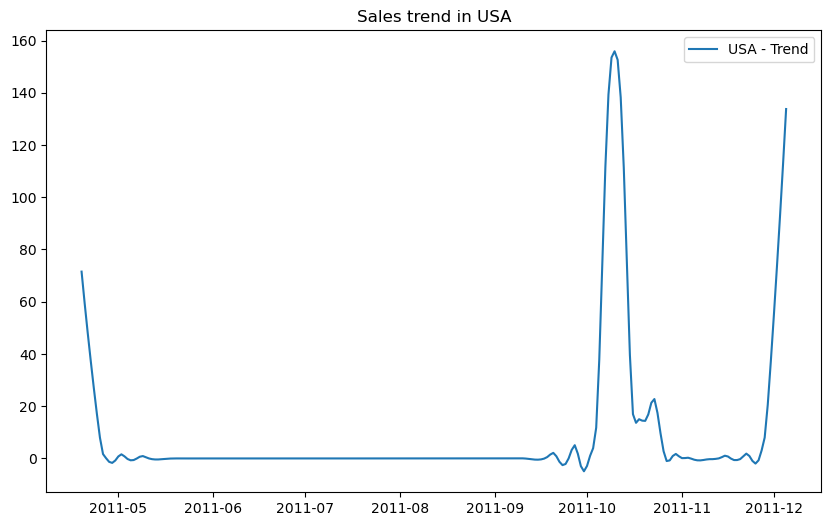

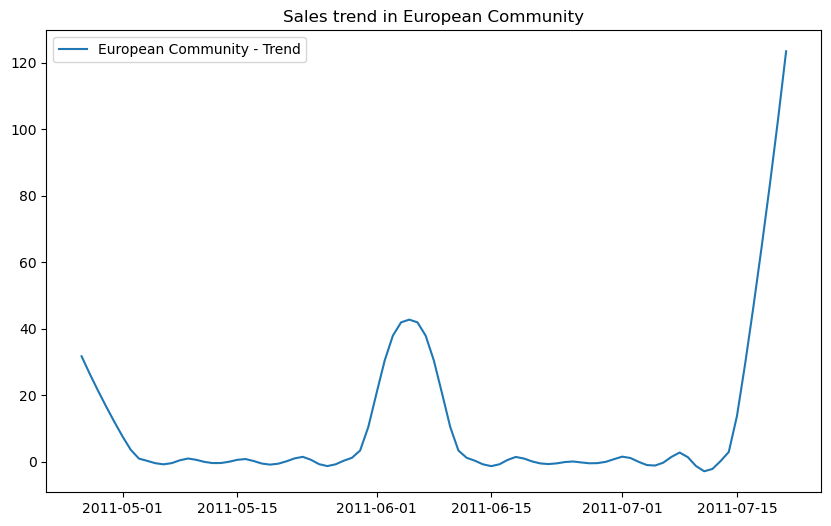

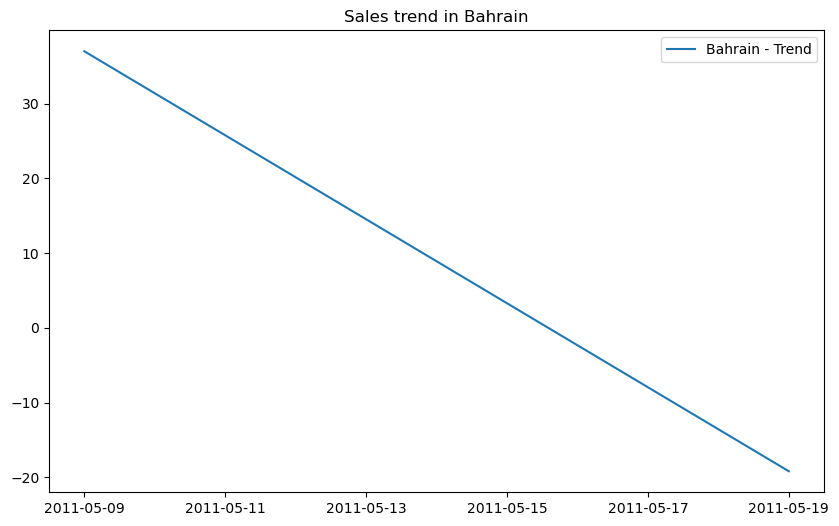

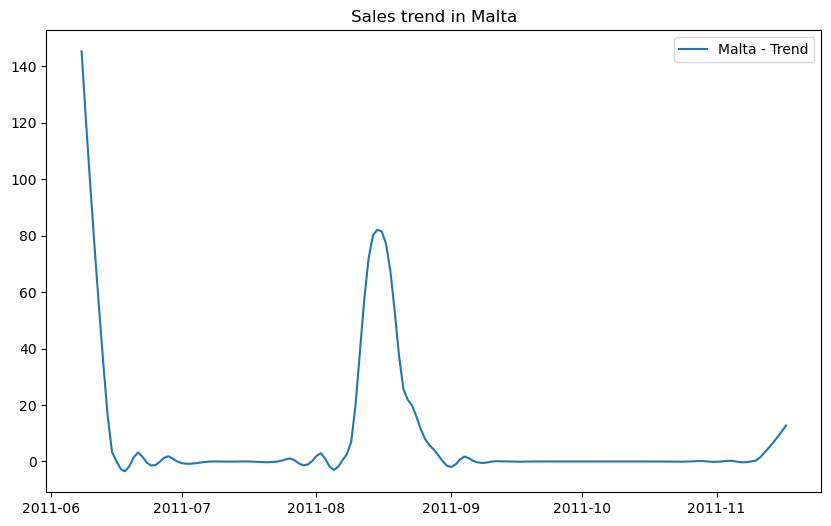

Not enough data for STL in RSA


In [27]:
# Analysis by different countries
for country in df['Country'].unique():
    df_country = df[df['Country'] == country]
    df_daily = df_country.groupby('InvoiceDate')['sales'].sum().reset_index()
    df_daily = df_daily.set_index('InvoiceDate').resample('D').sum().fillna(0)
    if len(df_daily) >=7:
        stl = STL(df_daily['sales'], seasonal=7)
        result= stl.fit()
        plt.figure(figsize=(10,6))
        plt.plot(df_daily.index, result.trend, label=f'{country} - Trend')
        plt.legend()
        plt.title(f'Sales trend in {country}')
        plt.show()
    else:
        print(f'Not enough data for STL in {country}')

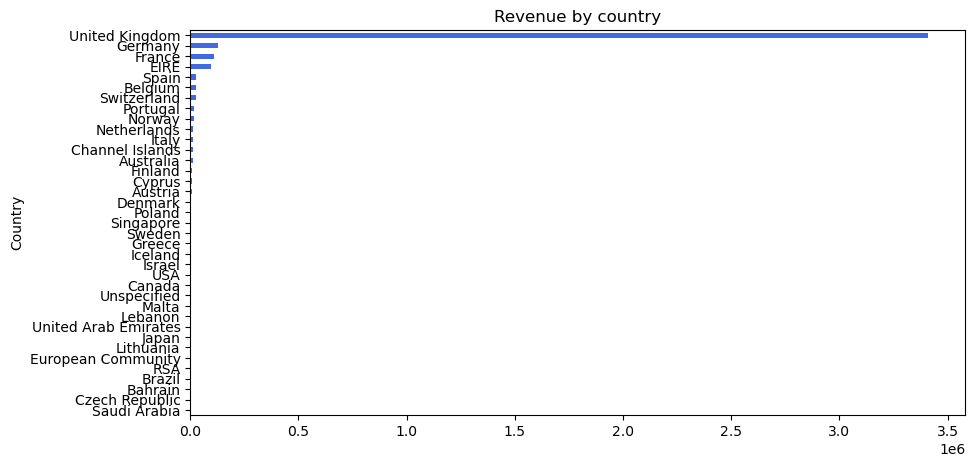

In [28]:
# Revenue by country
Country_sales = df.groupby('Country')['sales'].sum().sort_values()
Country_sales.plot(kind='barh', figsize=(10,5), color='royalblue')
plt.title('Revenue by country')
plt.show()

#### 5) Identify dependencies between discounts and sales.

Note: There is no explicit information about discounts in the data, and it is difficult to determine a direct relationship between discounts and sales. So we will do a hypothetical analysis.

In [29]:
import statsmodels.api as sm

df4 = df.copy()

# We calculate the base (median) price for each product
base_price = df4.groupby('StockCode')['UnitPrice'].median().reset_index()
base_price.rename(columns={'UnitPrice': 'MedianPrice'}, inplace=True)

# Merge the base price into the main dataframe
df4 = df4.merge(base_price, on='StockCode')

# We set the "potential discount" flag if the price is below 90% of the median
df4['discount_flag'] = df4['UnitPrice'] < (0.9 * df4['MedianPrice'])

# We calculate average sales for products with and without discounts
sales_summary = df4.groupby('discount_flag').agg({'sales': ['mean', 'sum', 'count']})
print(sales_summary)

                   sales                     
                    mean          sum   count
discount_flag                                
False          11.936299  3739153.094  313259
True           27.948945   230299.310    8240


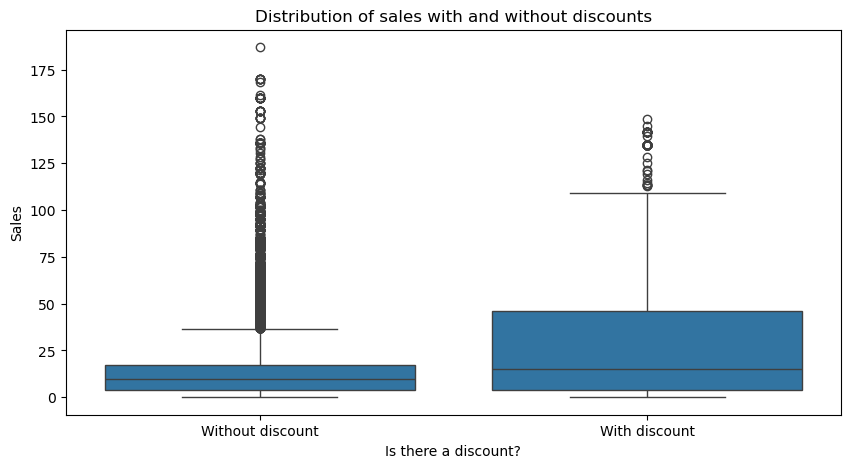

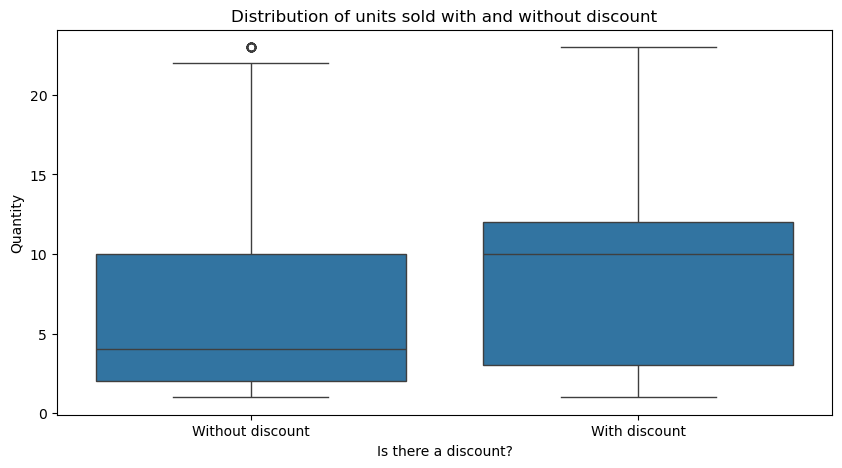

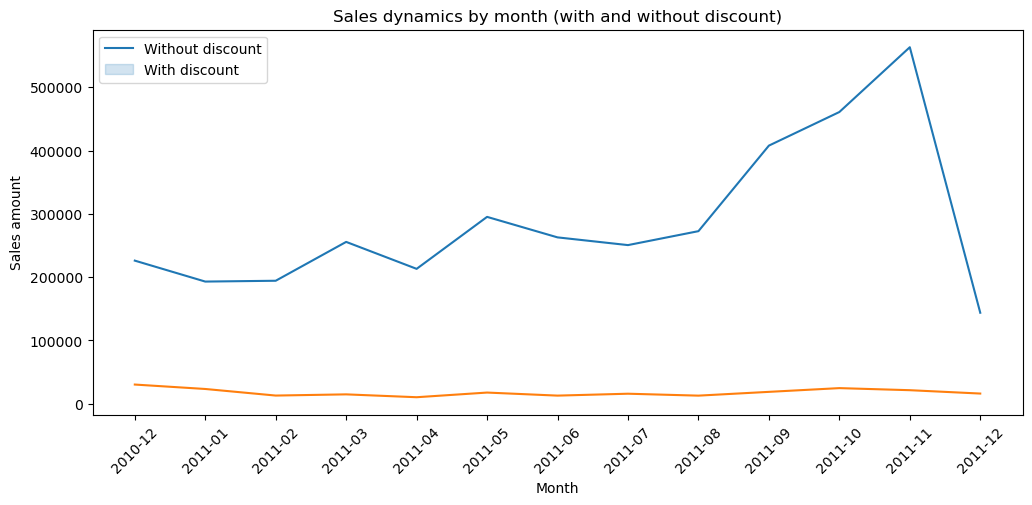

In [30]:
# Visualization of sales distribution
plt.figure(figsize=(10,5))
sns.boxplot(data=df4, x='discount_flag', y='sales')
plt.title('Distribution of sales with and without discounts')
plt.xlabel('Is there a discount?')
plt.ylabel('Sales')
plt.xticks([0,1], ['Without discount', 'With discount'])
plt.show()

# Correlation between "discount flag" and number of units sold
plt.figure(figsize=(10,5))
sns.boxplot(data=df4, x='discount_flag', y='Quantity')
plt.title('Distribution of units sold with and without discount')
plt.xlabel('Is there a discount?')
plt.ylabel('Quantity')
plt.xticks([0,1], ['Without discount', 'With discount'])
plt.show()

# Analysis by time
df4['month'] = df4['InvoiceDate'].dt.to_period('M')
monthly = df4.groupby(['month', 'discount_flag']).agg({'sales': 'sum'}).reset_index()
monthly['month'] = monthly['month'].astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='month', y='sales', hue='discount_flag')
plt.title('Sales dynamics by month (with and without discount)')
plt.ylabel('Sales amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(['Without discount', 'With discount'])
plt.show()

#### 6) Report and recommendations.

##### Executive Summary
This analysis evaluated sales performance and profitability across product categories and countries within an e-commerce business. The primary goals were to identify revenue drivers, analyze the impact of discounts, detect seasonal trends, and provide actionable strategies to boost overall profitability.

##### Key Business Insights
1. Sales & Revenue Breakdown
    - Total revenue for the period: 3.97M (currency unspecified).
    - Category A and B are the top-performing segments, generating 47.3% of total revenue, with profit contributions of 22.8% and 24.5%, respectively.
    - The UK remains the leading market, followed closely by Germany, France, and EIRE, all demonstrating strong sales activity.
2. Seasonality and Forecast
    - Significant sales peaks in Q4 (September–December), aligning with holiday and promotional periods.
    - STL decomposition confirms low seasonality in H1 and high seasonality in H2.
    - SARIMAX forecasting indicates a sustained upward trend in overall sales, suggesting continued growth potential.
3. Impact of Discounts
    - Discounted products show higher unit volumes and total sales, confirming a positive correlation between discounting and demand.
    - However, discounts negatively affect profit per unit, requiring a margin-focused discount strategy.
    - Incomplete historical data limits the ability to fully analyze discount timing and market-specific effects.
4. Category & Market Opportunities
    - Category C, despite generating 52.7% of total sales, has relatively low profitability — indicating potential overreliance on low-margin products.
    - Some underperforming categories exhibit stagnant growth and may require either repositioning or removal.
    - Emerging sales growth is observed in Germany, France, and EIRE, suggesting market expansion opportunities beyond the UK.

##### Strategic Recommendations
1. Product Portfolio Optimization
    - Re-evaluate Category C: While it drives volume, it lacks profitability. Consider repricing strategies, bundling, or targeted upsells to improve margins.
    - Phase out or reposition low-margin products with weak performance, particularly in stagnant categories.
2. Discount Strategy Refinement
    - Implement targeted discounting for fast-moving or seasonal products.
    - Avoid blanket discounting — instead, run A/B tests in key regions to identify optimal timing and product combinations.
    - Use discounts tactically during low-season months (January–August) to maintain demand while protecting margins.
3. Marketing and Sales Focus
    - Increase marketing spend for high-margin products and top-performing categories.
    - Launch category-focused campaigns in emerging markets like Germany, France, and EIRE to capitalize on growing momentum.
4. Inventory and Supply Chain
    - Use seasonal insights to adjust inventory levels in advance of Q4 demand surges — mitigating both stock-outs and overstock risks.
    - Introduce dynamic restocking models based on product velocity and regional demand trends.
5. Data-Driven Expansion
    - Collect additional data from low-performing markets to understand demand patterns and identify untapped opportunities.
    - Invest in customer segmentation and behavior tracking to personalize offerings and promotions.

##### Expected Impact
     Initiative	                      Business Impact
    Optimize Category C strategy	↑ Profit margins, ↓ reliance on volume
    Refined discounting             ↑ ROI on promotions, ↓ margin erosion
    Region-focused marketing        ↑ Revenue in emerging markets
    Inventory alignment to season	↓ Lost sales, ↓ overstock costs
    Data expansion & segmentation	↑ Personalization, ↑ customer retention

##### Final Thoughts
This analysis provides a roadmap to enhance profitability and operational efficiency. By implementing the above recommendations — particularly around product strategy, discount refinement, and market-specific focus — the business can sustainably scale revenue while protecting margins and improving customer experience.

In [31]:
#df4['discount_flag'] = df4['discount_flag'].replace({True: 'With discount', False: 'Without discount'})

In [33]:
#df4.to_csv('Online Retail_LS2.csv', index=False)